<a href="https://colab.research.google.com/github/AitorNoel/PontiaProyectoJupiter/blob/main/VENTAS_TIPOS_ENVIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analítica Rentabilidad Pontia SuperStore: Estudio de los Tipos de Envios

## Importacion de Librerias y Datos

In [2]:
# Librerías Procesamiento de Datos.
import pandas as pd
import numpy as np

# Librería de Visualización
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

Google Colab

In [4]:
## En Google Colab
from google.colab import files
uploaded = files.upload()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import io
df = pd.read_excel("/content/drive/MyDrive/PONTIA/VISUALIZACION/VISUALIZACION PYTHON/Practica/PontiaSuperStore.xls")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


En local

In [7]:
df = pd.read_excel("/content/drive/MyDrive/PONTIA/VISUALIZACION/VISUALIZACION PYTHON/Practica/PontiaSuperStore.xls", sheet_name="Orders")
# df = pd.read_csv("Sample - Superstore.csv", encoding = 'Windows-1254')

Visualiza una Muestra del dataset:

## Genera las siguientes variables calculadas.
- Sales/Quantity
- Profit/Quantity
- flag_descuento
- Year

Respuesta:

In [8]:
sales=df.groupby('Product ID').agg({'Quantity':'sum','Sales':'sum'})
print (sales)

                 Quantity     Sales
Product ID                         
FUR-BO-10000112         9   825.174
FUR-BO-10000330        10  1064.624
FUR-BO-10000362        14  2154.348
FUR-BO-10000468        21   723.842
FUR-BO-10000711        12   851.760
...                   ...       ...
TEC-PH-10004912        11   516.530
TEC-PH-10004922        19  1085.238
TEC-PH-10004924         8    56.164
TEC-PH-10004959         4   341.666
TEC-PH-10004977        32  5291.730

[1862 rows x 2 columns]


In [9]:
profit=df.groupby('Product ID').agg({'Sales':'count','Profit':'sum'})
print (profit)

                 Sales    Profit
Product ID                      
FUR-BO-10000112      1 -117.8820
FUR-BO-10000330      3   24.1960
FUR-BO-10000362      5  311.1836
FUR-BO-10000468      6 -133.1092
FUR-BO-10000711      2  229.9752
...                ...       ...
TEC-PH-10004912      3   87.3705
TEC-PH-10004922      5  130.6305
TEC-PH-10004924      3   13.0064
TEC-PH-10004959      2   40.1960
TEC-PH-10004977      9  838.8372

[1862 rows x 2 columns]


In [10]:
df['Profit']=df['Sales']-df['Discount']

In [11]:
beneficio_por_producto=df.groupby('Product ID')['Profit'].sum()
print(beneficio_por_producto)

Product ID
FUR-BO-10000112     824.874
FUR-BO-10000330    1064.324
FUR-BO-10000362    2153.698
FUR-BO-10000468     722.742
FUR-BO-10000711     851.760
                     ...   
TEC-PH-10004912     516.130
TEC-PH-10004922    1084.638
TEC-PH-10004924      55.964
TEC-PH-10004959     341.466
TEC-PH-10004977    5290.330
Name: Profit, Length: 1862, dtype: float64


In [12]:
beneficio_total=beneficio_por_producto.sum()
beneficio_total_redondeado=round(beneficio_total,2)
print(beneficio_total_redondeado)

2295639.77


In [13]:
df_year=df['Order Date'].dt.year
print(df_year)


0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Order Date, Length: 9994, dtype: int32


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Elegir un Template:

In [15]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [16]:
pio.templates.default = "simple_white"

Selección de Colores:

In [17]:
colores_envios ={'Standard Class':'darkred', 'First Class':'darkgreen', 'Second Class':'darkblue', 'Same Day':'darkorange'}
color_graficos = "#0A5337"

# **Tipos de Envios**

## ¿Qué porcentaje de las ventas se hacen según cada tipo de Modalidad de envio por Barco?

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,261.9600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,731.9400
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,14.6200
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,957.1275
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,22.1680


In [40]:
total_ventas=df['Sales'].count()
total_ventas

9994

In [41]:
ventas_por_clase=df.groupby('Ship Mode')['Sales'].count()
ventas_por_clase

Ship Mode
First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
Name: Sales, dtype: int64

In [44]:
porcentaje_ventas_por_clase=(ventas_por_clase/total_ventas)*100
porcentaje_ventas_por_clase

Ship Mode
First Class       15.389234
Same Day           5.433260
Second Class      19.461677
Standard Class    59.715829
Name: Sales, dtype: float64

#### Preparación del Dato.

Realiza las agregaciones necesarias para poder graficar.

Respuesta:

Elegimos un gráfico de...


Queremos que quede para enseñarselo al mismisimo CEO!
- Customiza el Titulo.
- El nombre de las etiquetas.
- Queremos que de forma interactiva aparezca el nº Ventas.

Respuesta:

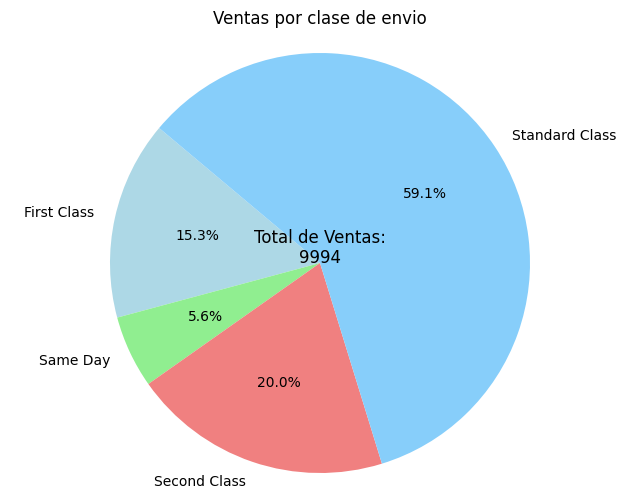

In [53]:
# Grafico de Tarta.
ship_modes=fig_pie_shipmode['Ship Mode']
ventas=fig_pie_shipmode['Ventas']
colores=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(8,6))
plt.pie(ventas,labels=ship_modes, colors=colores, autopct='%1.1f%%',startangle=140)
plt.title('Ventas por clase de envio')
plt.text(0, 0, f'Total de Ventas:\n{total_ventas}', fontsize=12, color='black', ha='center')
plt.axis('equal')
plt.show()

¿Cúal es el modo de envió predominante en la empresa?

#el modo d envio predominante de la empresa es el "Standard Class"

Elegir un Template:

¿Con qué argumento podemos hacer un donnut con el gráfico? https://plotly.com/python-api-reference/generated/plotly.express.pie

Modifica el color de cada tipo de envio.

## ¿Cómo han evolucionado con el tiempo las modalidades de envios?

Estudiando la evolución temporal queremos ver si es algo que se ha mantenido desde el origen, si ha aumentado o decrecido con el paso del tiempo...

Preparación del Dato:

Respuesta:

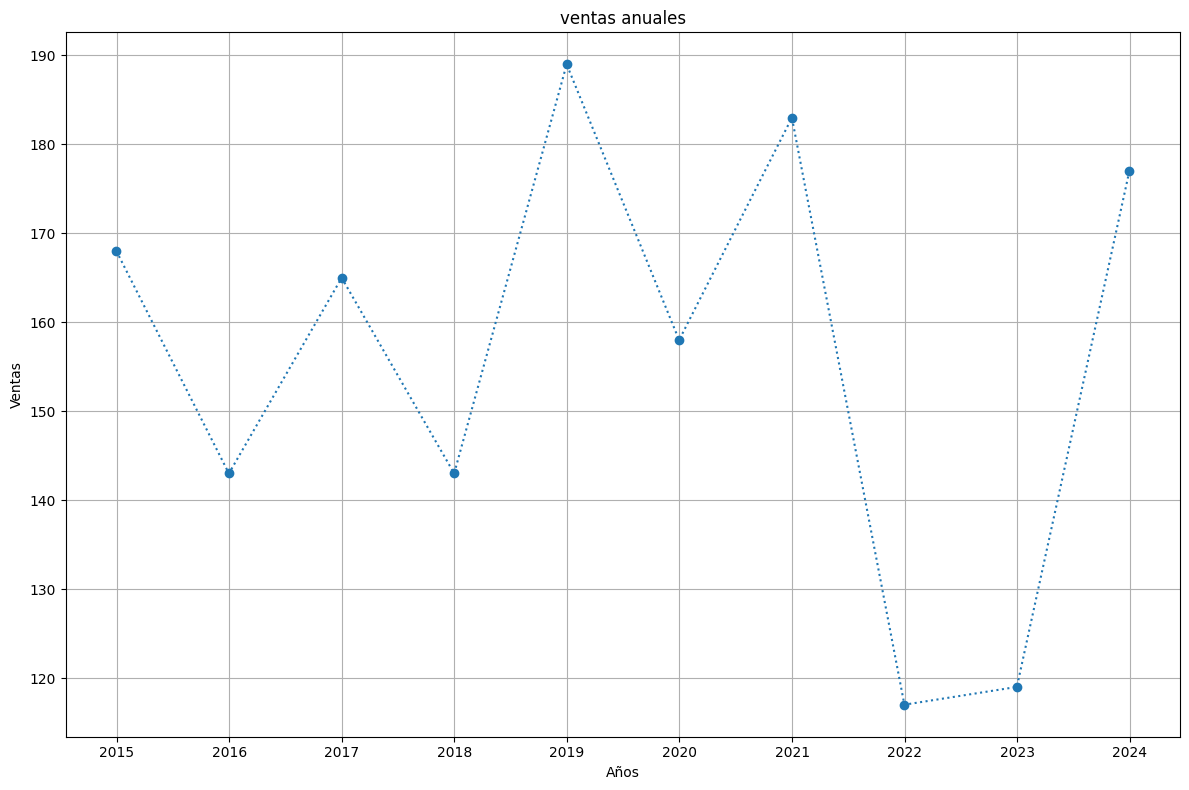

In [77]:
# Preparacion del dato.
#GRAFICO DE VENTAS ANUALES
año_entrada= 2014
año_salida=2024
años=pd.date_range(start=str(año_entrada),end=str(año_salida),freq='Y')
ventas=np.random.randint(100,200,size=len(años))
plt.figure(figsize=(12,8))
plt.plot(años,ventas, marker='o',linestyle='dotted')
plt.title('ventas anuales')
plt.xlabel('Años')
plt.ylabel('Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()

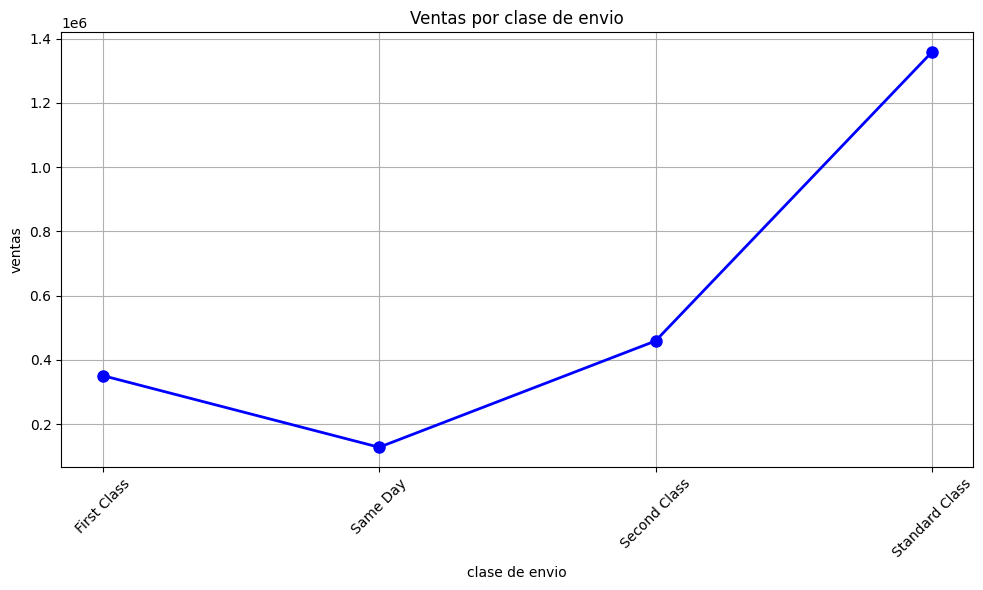

In [78]:
#GRAFICO POR  VENTAS POR CLASE DE ENVIO
ship_modes=fig_pie_shipmode['Ship Mode']
ventas=fig_pie_shipmode['Ventas']
colores=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(10,6))
plt.plot(ship_modes,ventas,marker='o', color='b',linestyle='-',linewidth=2,markersize=8)
plt.title('Ventas por clase de envio')
plt.xlabel('clase de envio')
plt.ylabel('ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Eligiremos una gráfica de...

In [79]:
import plotly.express as px

fig_line_discount = px.line(x=ship_modes, y=ventas, color_discrete_sequence=['blue'], markers=True)


fig_line_discount.update_xaxes(showgrid=True, gridcolor='lightgray')
fig_line_discount.update_yaxes(showgrid=True, gridcolor='lightgray')

fig_line_discount.update_layout(
    title='Ventas por clase de envío',
    xaxis_title='Clase de envío',
    yaxis_title='Ventas'
)

fig_line_discount.show()

Elementos de interes a añadir en la gráfica:

- Añade Grid en la gráfica (fig_line_discount.update_xaxes)
- Añade el importe total de las ventas en hover_data (quizá tengas que modificar el groupby...)

## ¿Cómo ha impactado en la rentabilidad del negocio?

Queremos comparar el beneficio por unidad de producto contra las ventas por unidad de producto (esto es la rentabilidad de cada venta). Y queremos ver cómo de diferente es la rentabilidad en función si un descuento fue aplicado o no.

Preparación del Dato. Respuesta.

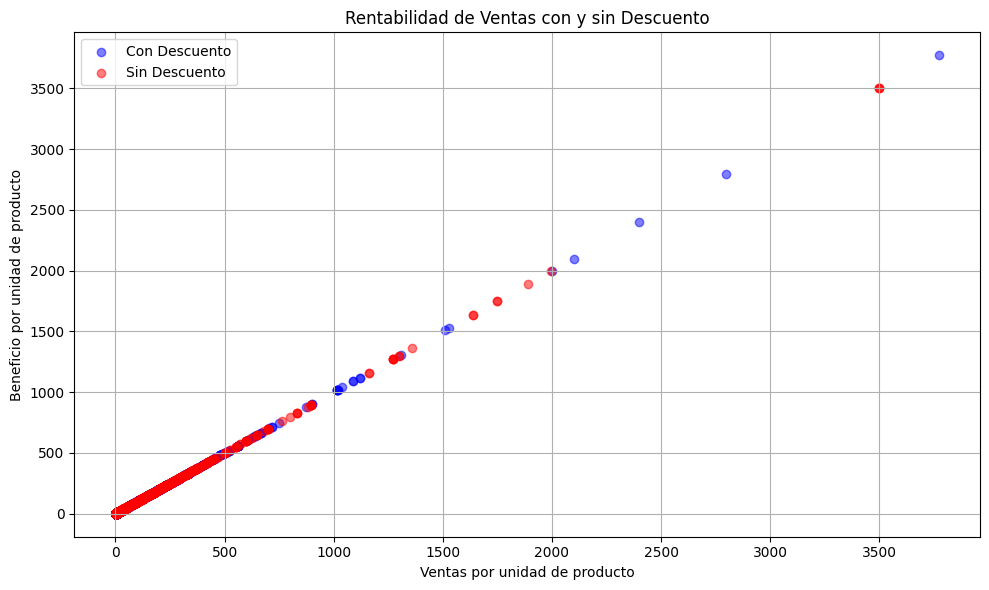

In [81]:
import matplotlib.pyplot as plt


beneficio_por_unidad = df['Profit'] / df['Quantity']
ventas_por_unidad = df['Sales'] / df['Quantity']

data = {
    'Beneficio por unidad': beneficio_por_unidad,
    'Ventas por unidad': ventas_por_unidad,
    'Descuento aplicado': df['Discount'] > 0
}
df_rentabilidad = pd.DataFrame(data)


con_descuento = df_rentabilidad[df_rentabilidad['Descuento aplicado'] == True]
sin_descuento = df_rentabilidad[df_rentabilidad['Descuento aplicado'] == False]


plt.figure(figsize=(10, 6))
plt.scatter(con_descuento['Ventas por unidad'], con_descuento['Beneficio por unidad'], color='blue', label='Con Descuento', alpha=0.5)
plt.scatter(sin_descuento['Ventas por unidad'], sin_descuento['Beneficio por unidad'], color='red', label='Sin Descuento', alpha=0.5)


plt.title('Rentabilidad de Ventas con y sin Descuento')
plt.xlabel('Ventas por unidad de producto')
plt.ylabel('Beneficio por unidad de producto')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Preguntas:

- ¿Son rentables todos los modos de envio?

- ¿Observas algún outlier? ¿Varia el resultado?

## ¿Variará en función de la categoria de productos?

Respuesta:

fig_reg_category_shipmode = ...

Preguntas:

- ¿Como varía la rentabilidad según los productos y el modo de envio seleccionado?

### **Bonus:**

## ¿Influye el Modo de Envios en la tasa de Devolución?

En el excel de tenemos conocimiento sobre devoluciones. Puedes "unirlo" (merge) a nuestro dataset para ver si la elección del metodo de envio puede repercutir en las devoluciones.

Preparación del dato:

In [ ]:
df_returns = pd.read_excel("PontiaSuperStore.xls", sheet_name="Returns")

Respuesta:

# Guardado del Trabajo.

Transformando nuestro Notebook en un Reporting.

In [ ]:
fig_reg_category_shipmode.write_html("fig_reg_category_shipmode.html")

In [ ]:
!jupyter nbconvert  --to html --no-input Pontia_CasoPractico2_20231221.ipynb